# Linear Regression With Random Data

Now that we have covered how linear regression works, we will test the theory using random sample data.

In [1]:
# Import analytics libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

First, we define the functions we first saw in notebook 5. How Linear Regression Works.

In [2]:
def slope_intercept(x, y):
    
    m_numerator = ( (np.mean(x)*np.mean(y)) - np.mean(x*y) )
    m_denominator = ( np.mean(x)**2 - np.mean(x**2))
    
    m = m_numerator / m_denominator
    
    b = np.mean(y) - m  * np.mean(x)
    
    return m, b

In [3]:
def predict_y(x):
    return m*x + b

def regression_line(x_array):
    return [predict_y(x) for x in x_array]

In [4]:
def squared_error(y_actual, y_predicted):
    
    return sum( (y_predicted - y_actual)**2 )

def coefficient_of_determination(y_actual, y_predicted):
    
    y_mean_line = [np.mean(y_actual) for y in y_actual]
    
    regression_squared_error = squared_error(y_actual, y_predicted)
    
    squared_error_y_mean = squared_error(y_actual, y_mean_line)
    
    return 1 - (regression_squared_error / squared_error_y_mean)

Now we define a function that will generate a random dataset of x values and y values.  This function will include parameters allowing us to define the desired variance and direction of correlation.

In [8]:
# come back and recreate the random array generator using numpy instead of random
import random

def create_dataset(number_of_datapoints, variance, step=2, correlation=False):
    val = 1 # Define first y value
    y_array = [] # Initialize empty list for y values
    
    for i in range(number_of_datapoints):
        y = val + random.randrange(-variance, variance) # Add random variance to the current value
        y_array.append(y) # Add random y variable to y array
        
        if correlation == 'positive':
            val += step
        elif correlation == 'negative':
            val -= step   
        
    x_array = [i for i in range(number_of_datapoints)]
    
    return np.array(x_array, dtype=np.float64), np.array(y_array, dtype=np.float64)

Now we test our random array generator, and pass the data into our linear regression functions.

In [9]:
# Create random data
x_array, y_array = create_dataset(40, 40, 2, correlation='positive')

# Define slope and y-intercept
m, b = slope_intercept(x_array, y_array)

regression_line = regression_line(x_array)

TypeError: 'list' object is not callable

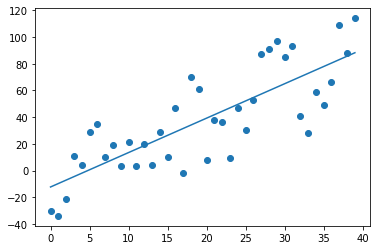

0.6373315837722329


In [7]:
plt.scatter(x_array, y_array)
plt.plot(x_array, regression_line)
plt.show()
print(coefficient_of_determination(y_array, regression_line))